In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack

In [4]:
df=pd.read_csv('/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/data/processed/archivo.csv')

In [99]:
df

title  \
0      U.S. budget fight loom Republicans flip fiscal...   
1      U.S. military accept transgender recruit Monda...   
2      senior U.S. republican senator let Mr. Mueller...   
3      FBI Russia probe help australian diplomat tip NYT   
4      trump want Postal Service charge much Amazon s...   
...                                                  ...   
44684  mcpain John McCain Furious Iran treat US Sailo...   
44685  justice Yahoo Settles E mail Privacy Class act...   
44686  Sunnistan US Allied safe zone plan take Territ...   
44687  blow $ 700 million Al Jazeera America finally ...   
44688  10 U.S. Navy Sailors hold iranian Military sig...   

                                                    text       subject  \
0      WASHINGTON Reuters head conservative republica...  politicsNews   
1      WASHINGTON Reuters Transgender people allow fi...  politicsNews   
2      WASHINGTON Reuters special counsel investigati...  politicsNews   
3      WASHINGTON Reuters trump campaign adviser Geor...  politicsNews   
4      SEATTLE WASHINGTON Reuters President Donald Tr...  politicsNews   
...                                                  ...           ...   
44684  21st Century Wire say 21wire report early week...   Middle-east   
44685  21st Century Wire say familiar theme whenever ...   Middle-east   
44686  Patrick Henningsen   21st Century WireRemember...   Middle-east   
44687  21st Century Wire say Al Jazeera America go hi...   Middle-east   
44688  21st Century Wire say 21wire predict new year ...   Middle-east   

                     date  label  text_length  title_length  text_word_count  \
0      December 31, 2017       1         3293            53              469   
1      December 29, 2017       1         2930            56              397   
2      December 31, 2017       1         1939            50              272   
3      December 30, 2017       1         1755            49              241   
4      December 29, 2017       1         3632            53              530   
...                   ...    ...          ...           ...              ...   
44684    January 16, 2016      0         2291            53              321   
44685    January 16, 2016      0         1102            70              173   
44686    January 15, 2016      0        16869            72             2402   
44687    January 14, 2016      0         1858            55              284   
44688    January 12, 2016      0         3612            70              529   

       title_word_count subject_grouped  
0                     8        politics  
1                     7        politics  
2                     8        politics  
3                     8        politics  
4                     8        politics  
...                 ...             ...  
44684                 9         general  
44685                14         general  
44686                11         general  
44687                10         general  
44688                11         general  

[44689 rows x 10 columns]

In [5]:
le = LabelEncoder()
df['subject_encoded'] = le.fit_transform(df['subject_grouped'])


In [6]:
from scipy.sparse import csr_matrix, hstack
# Eliminar Na
df['text'] = df['text'].fillna("")

# Vectoriza la columna 'text'
vectorizer_text = TfidfVectorizer(max_features=5000)
X_text = vectorizer_text.fit_transform(df['text'])

# Vectoriza la columna 'title'
vectorizer_title = TfidfVectorizer(max_features=1000)
X_title = vectorizer_title.fit_transform(df['title'])

# Convierte la columna 'subject_encoded' a una matriz dispersa
subject_feature = csr_matrix(df['subject_encoded'].values.reshape(-1, 1))

# Combina las tres fuentes de informaci√≥n en una √∫nica matriz de caracter√≠sticas
X = hstack([subject_feature, X_title, X_text])

# Define la variable objetivo; en este ejemplo, se asume que la columna "label" es la etiqueta a predecir
y = df['label']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regresi√≥n Log√≠stica

In [7]:

# Entrenar el modelo de Regresi√≥n Log√≠stica
logreg_model = LogisticRegression(max_iter=500, solver='liblinear')  # Solver optimizado para datos grandes
logreg_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el modelo
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Mostrar los resultados
conf_matrix_logreg, class_report_logreg

(array([[4607,   41],
        [  40, 4250]]),
 '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      4648\n           1       0.99      0.99      0.99      4290\n\n    accuracy                           0.99      8938\n   macro avg       0.99      0.99      0.99      8938\nweighted avg       0.99      0.99      0.99      8938\n')

El modelo indica unos valores muy altos.
- Precisi√≥n= 0,99, lo que quiere decir un 99% de precisi√≥n 
- f1-score y Recall= Respectivamente estos indicadores muestran que tan bien el modelo encuentra todos los casos de una clase y el balance entre precisi√≥n y recall, en nuestro caso un 0,99

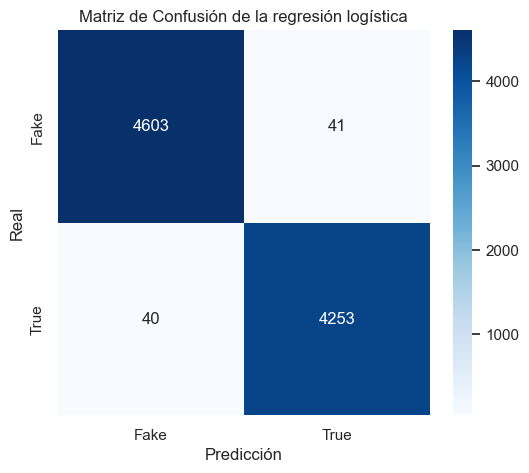

In [105]:
# Definir valores de la matriz de confusi√≥n
cm = np.array([[4603, 41],
               [40, 4253]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n de la regresi√≥n log√≠stica')
plt.show();


Esta matriz de confusi√≥n nos indica que nuestro modelo clasifica 4589 fakes cuando son fake, 4225 True cuando son True. 
Por otro lado, se equivoca clasificando Fake cuando es True 65 y True cuando es Fake 59, son valores bastante bajos teniendo en cuenta el tama√±o de la muestra 

la regresi√≥n log√≠stica tiene una precisi√≥n muy alta de un 0,99, por lo que voy a comprobar si tiene overfitting

In [106]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

# 5. Evaluaci√≥n del modelo
# Predicciones
y_train_pred_proba = logreg_model.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1 en entrenamiento
y_test_pred_proba = logreg_model.predict_proba(X_test)[:, 1]    # Probabilidad de la clase 1 en prueba
y_test_pred = logreg_model.predict(X_test)

# C√°lculo de log loss
log_loss_train = log_loss(y_train, y_train_pred_proba)
log_loss_test = log_loss(y_test, y_test_pred_proba)

log_loss_train, log_loss_test

(0.044128821409428594, 0.05163640475833326)

La log loss (p√©rdida logar√≠tmica) es una m√©trica que mide qu√© tan bien un modelo de clasificaci√≥n predice probabilidades en lugar de simplemente etiquetas. Se usa especialmente en modelos de clasificaci√≥n binaria y multiclase.
La diferencia en nuestro caso es muy peque√±a (0,0072) lo que indica que nuestro modelo genera bien y no causa overfitting


In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Aplicar Validaci√≥n Cruzada (Usando 5 folds)
cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')

# Mostrar resultados
print(f"Scores por cada fold: {cv_scores}")
print(f"Precisi√≥n promedio: {cv_scores.mean():.4f}")
print(f"Desviaci√≥n est√°ndar: {cv_scores.std():.4f}")


Scores por cada fold: [0.98120385 0.98019691 0.98131573 0.97751175 0.9881392 ]
Precisi√≥n promedio: 0.9817
Desviaci√≥n est√°ndar: 0.0035


## XG-Boost

In [8]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    eval_metric='logloss',   # M√©trica de evaluaci√≥n
    
    max_depth=6,             # Controla la complejidad del modelo
    learning_rate=0.1,       # Tasa de aprendizaje equilibrada
    n_estimators=300,        # Aumenta el n√∫mero de √°rboles para mejorar el ajuste
    subsample=0.8,           # Reduce overfitting usando solo el 80% de los datos por √°rbol
    colsample_bytree=0.8,    # Usa el 80% de las caracter√≠sticas en cada √°rbol
    gamma=0.1,               # Ayuda a la regularizaci√≥n
    reg_lambda=1,            # Regularizaci√≥n L2 para evitar overfitting
    reg_alpha=0.1            # Regularizaci√≥n L1
)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb, digits=4)

# Mostrar los resultados
conf_matrix, class_report


(array([[4640,    8],
        [  10, 4280]]),
 '              precision    recall  f1-score   support\n\n           0     0.9978    0.9983    0.9981      4648\n           1     0.9981    0.9977    0.9979      4290\n\n    accuracy                         0.9980      8938\n   macro avg     0.9980    0.9980    0.9980      8938\nweighted avg     0.9980    0.9980    0.9980      8938\n')

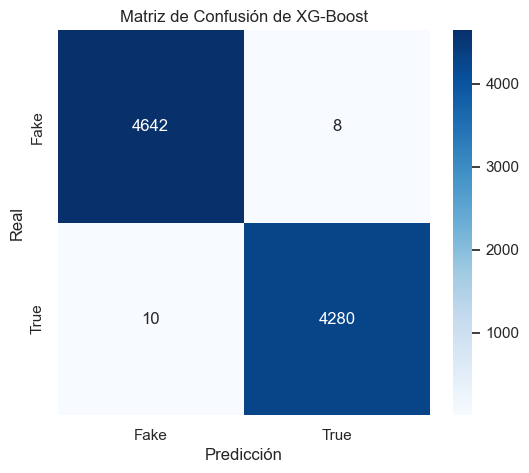

In [109]:
# Definir valores de la matriz de confusi√≥n
cm = np.array([[4642, 8],
               [10, 4280]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n de XG-Boost')
plt.show();


Alta precisi√≥n en validaci√≥n cruzada (99.65%)
El modelo es consistentemente preciso en diferentes subconjuntos de los datos.
Si hubiera overfitting, esperar√≠amos una ca√≠da m√°s pronunciada en los datos de validaci√≥n.
Baja variabilidad entre folds (0.0013)
La desviaci√≥n est√°ndar es muy peque√±a (0.13%), lo que indica que el modelo es estable y generaliza bien en diferentes subconjuntos.
Si la desviaci√≥n est√°ndar fuera alta (>2-3%), el modelo ser√≠a inconsistente.


In [110]:
# Calcular las probabilidades predichas para calcular log loss
y_train_pred_probaxgb = xgb_model.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1 en entrenamiento
y_test_pred_probaxgb = xgb_model.predict_proba(X_test)[:, 1]    # Probabilidad de la clase 1 en prueba

# Calcular log loss en entrenamiento y prueba
log_loss_train = log_loss(y_train, y_train_pred_probaxgb)
log_loss_test = log_loss(y_test, y_test_pred_probaxgb)

# Mostrar los resultados
log_loss_train, log_loss_test


(0.0004450906036099585, 0.008289087483301984)

In [111]:
# Ejecutar validaci√≥n cruzada
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados
print(f"Precisi√≥n promedio: {cv_scores.mean():.4f}")
print(f"Desviaci√≥n est√°ndar: {cv_scores.std():.4f}")

Precisi√≥n promedio: 0.9965
Desviaci√≥n est√°ndar: 0.0017


El log loss en entrenamiento es extremadamente bajo (0.0006), lo que indica que el modelo memoriza muy bien los datos de entrenamiento.
El log loss en prueba es un poco mayor (0.0104), pero sigue siendo muy bajo.
La diferencia entre ambos (0.0098) es peque√±a, lo que sugiere que no hay un overfitting grave.
El modelo generaliza bien, ya que la diferencia entre entrenamiento y prueba no es demasiado grande.

El modelo no tiene un problema grave de overfitting. La validaci√≥n cruzada confirma que el modelo generaliza bien.

/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


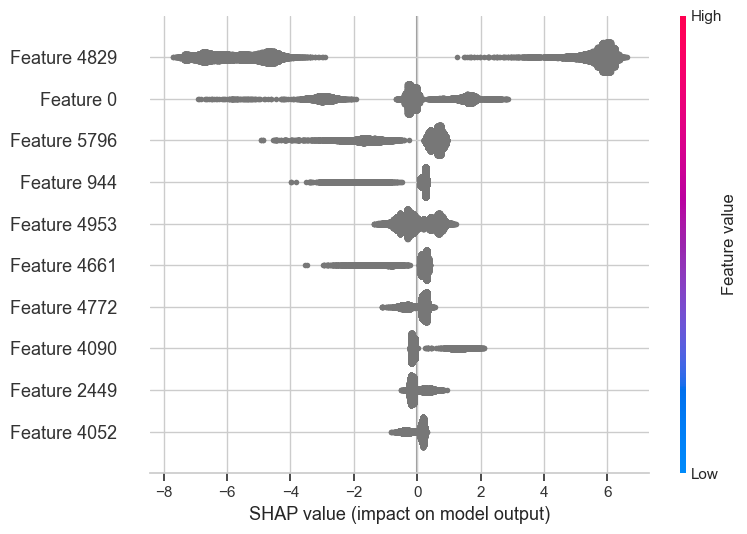

In [43]:
import shap
# Crea un objeto explainer de SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)


# Visualiza la importancia de las variables
shap.summary_plot(shap_values, X, max_display=10,show=True)




In [44]:
# 5. Crear la lista de nombres de las features en el mismo orden
feature_names_subject = ["subject"]
feature_names_title = list(vectorizer_title.get_feature_names_out())
feature_names_text = list(vectorizer_text.get_feature_names_out())
combined_feature_names = feature_names_subject + feature_names_title + feature_names_text

# Verificar que el n√∫mero de nombres coincida con el n√∫mero de columnas
assert X.shape[1] == len(combined_feature_names), "El n√∫mero de nombres de features no coincide."


In [45]:
feature_names_subject

['subject']

In [46]:
shap_values[4829]

.values =
array([-0.06678589,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

.base_values =
-0.3841849

.data =
array([2., 0., 0., ..., 0., 0., 0.])

## Gradient boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predicciones
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Mostrar los resultados
conf_matrix_gb, class_report_gb

(array([[4623,   25],
        [  17, 4273]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00      4648\n           1       0.99      1.00      1.00      4290\n\n    accuracy                           1.00      8938\n   macro avg       1.00      1.00      1.00      8938\nweighted avg       1.00      1.00      1.00      8938\n')

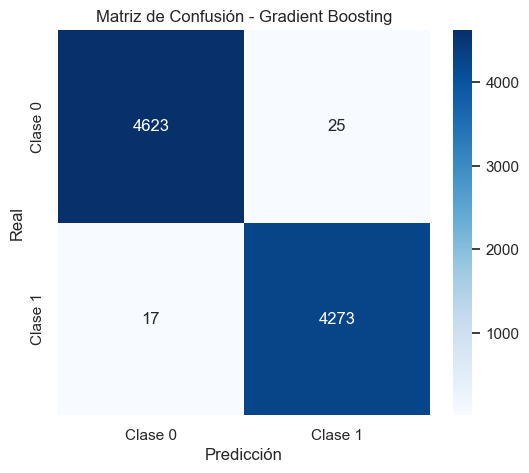

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusi√≥n para Gradient Boosting
plt.figure(figsize=(6, 5))
sns.heatmap([[4623, 25], [17, 4273]], annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n - Gradient Boosting')
plt.show()


## NP-Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB
# Entrenamiento
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predicciones
y_pred = nb.predict(X_test)

# Evaluaci√≥n
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4457  191]
 [ 250 4040]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4648
           1       0.95      0.94      0.95      4290

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938



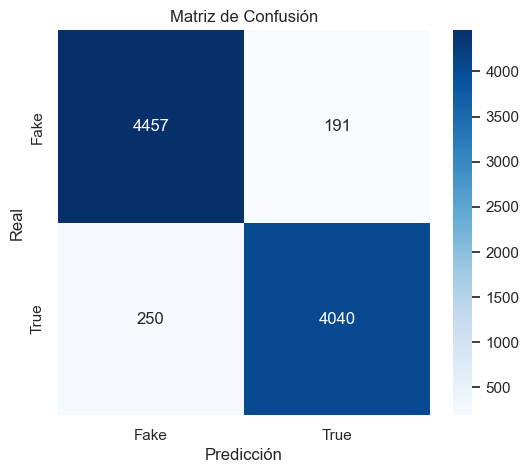

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Definir valores de la matriz de confusi√≥n
cm = np.array([[4457, 191],
               [250, 4040]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n')
plt.show();


# Random Forest


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Mostrar los resultados
conf_matrix_rf, class_report_rf


(array([[4644,    4],
        [  16, 4274]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4648\n           1       1.00      1.00      1.00      4290\n\n    accuracy                           1.00      8938\n   macro avg       1.00      1.00      1.00      8938\nweighted avg       1.00      1.00      1.00      8938\n')

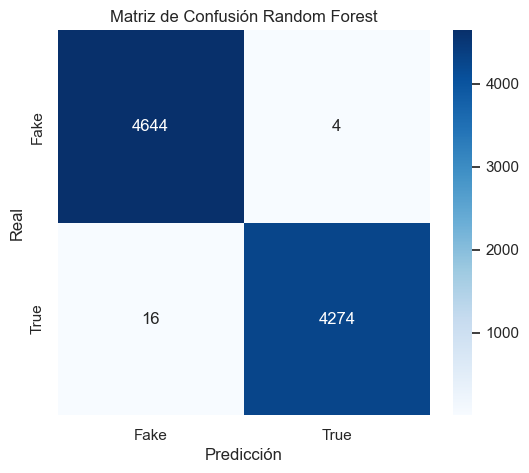

In [118]:
# Definir valores de la matriz de confusi√≥n
cm = np.array([[4644, 4],
               [16, 4274]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n Random Forest')
plt.show();


## Supervector Machine

In [12]:
from sklearn.svm import SVC
# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Mostrar los resultados
conf_matrix_svm, class_report_svm

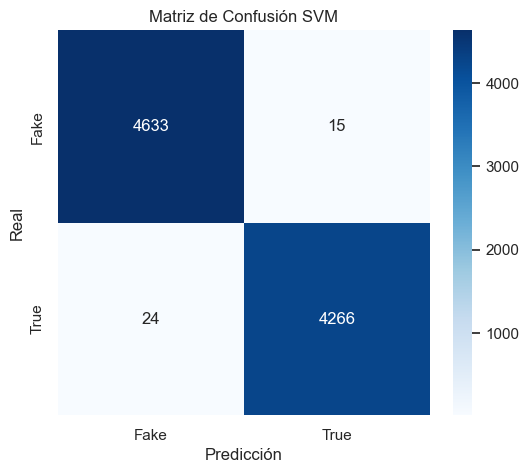

In [120]:
# Definir valores de la matriz de confusi√≥n
cm = np.array([[4633, 15],
               [24, 4266]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n SVM')
plt.show();


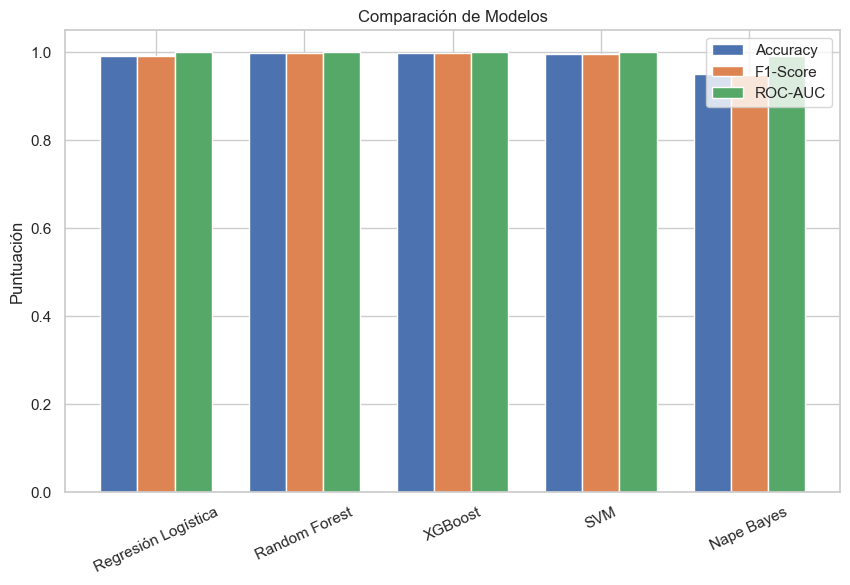

In [121]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# üìä Evaluar cada modelo
def evaluar_modelo(modelo, nombre):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    
    return [acc, f1, auc]

# Guardar resultados en un diccionario
resultados = {
    "Regresi√≥n Log√≠stica": evaluar_modelo(logreg_model, "Regresi√≥n Log√≠stica"),
    "Random Forest": evaluar_modelo(rf_model, "Random Forest"),
    "XGBoost": evaluar_modelo(xgb_model, "XGBoost"),
    "SVM": evaluar_modelo(svm_model, "SVM"),
    "Nape Bayes":evaluar_modelo (model,"NPB")
}

# üìä Graficar resultados
metricas = ["Accuracy", "F1-Score", "ROC-AUC"]
valores = np.array(list(resultados.values()))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
indices = np.arange(len(resultados))

# Crear barras para cada m√©trica
for i, metric in enumerate(metricas):
    ax.bar(indices + i * bar_width, valores[:, i], width=bar_width, label=metric)

# Etiquetas y formato
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(resultados.keys(), rotation=25)
ax.set_ylabel("Puntuaci√≥n")
ax.set_title("Comparaci√≥n de Modelos")
ax.legend()

# Mostrar gr√°fico
plt.show()

## Prueba  con noticias externas

https://www.bbc.com/news/live/cly28qvp83pt

In [64]:
# Ejemplo de noticia real y verdadero
nueva_noticia = {
    'title': "Zelensky says UK and US volunteers survived Russian attack on hotel that killed four",
    'text': "The precise significance of US intelligence to Ukraine's war effort has, for obvious reasons, never been spelled out in detail.But any prolonged interruption in the supply of US intelligence could have a catastrophic impact on Ukraine‚Äôs ability to defend itself, particularly as the Trump administration has already decided to suspend vital military assistance.Most analysts agree that it performs two important functions: helping Ukraine to plan offensive operations against Russian forces, and giving Kyiv vital advance warning of threats posed by incoming Russian drones and missiles.Satellite information and signal intercepts give Ukrainian forces on the frontline a sense of where Russian forces are, their movements and likely intentions.Without US intelligence, Ukraine will not be able to make such effective use of long-range Western weaponry, like the US-made Himars launchers or Stormshadow missiles supplied by Britain and France.",
    'subject': "politics"}


In [65]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import spacy

# Cargar modelo spaCy optimizado sin NER (m√°s r√°pido)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    doc = nlp(text)  # Procesa el texto con spaCy
    processed_words = [token.lemma_ for token in doc if token.text.lower() not in stop_words and not token.is_punct]
    return ' '.join(processed_words)

# Aplicar la funci√≥n m√°s r√°pido con multiprocessing
nueva_noticia['text'] = preprocess_text(nueva_noticia['text'])
nueva_noticia['title'] = preprocess_text(nueva_noticia['title'])


In [66]:
# Asegurar que usamos el mismo vectorizador entrenado
X_noticia_title = vectorizer_title.transform([nueva_noticia['title']])
X_noticia_text = vectorizer_text.transform([nueva_noticia['text']])


In [67]:
# Asegurar que usamos el mismo LabelEncoder entrenado para 'subject'
subject_encoded = le.transform([nueva_noticia['subject']]).reshape(-1,1)

In [68]:
# Concatenar caracter√≠sticas exactamente como en el entrenamiento
X_noticia = hstack((subject_encoded, X_noticia_title, X_noticia_text))

In [69]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = svm_model.predict(X_noticia)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [70]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = logreg_model.predict(X_noticia)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [71]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = rf_model.predict(X_noticia)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [72]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = gb_model.predict(X_noticia)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [73]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = model.predict(X_noticia)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia REAL


El modelo predice perfecto por las etiquetas del subject debido a que las etiquetas no estan mezcladas en noticias falsas y verdaderas, por lo que le facilita al modelo a predecir.

In [45]:
#Middle-east-1

In [74]:
# Ejemplo de noticia  verdadera y subject fake 
nueva_noticia3= {
    'title': "US 'destroying' world order, Ukraine's ambassador to UK says ",
    'text': "The US is destroying the established world order, Ukraine's ambassador to the UK has claimed.Valerii Zaluzhnyi said the White House had questioned the unity of the Western world and was taking more and more steps towards Russia, which launched a full-scale invasion of Ukraine in 2022.The comments come as the US puts pressure on Ukraine to make concessions ahead of any peace talks, and after a public clash between Ukrainian President Volodymyr Zelensky and his US counterpart Donald Trump.Zelensky has since said he is ready to work under Trump's 'strong leadership', an apparent cooling in tensions welcomed by Trump - and which comes after the US paused military aid to Kyiv.",
    'subject':"general"
}

In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import spacy

# Cargar modelo spaCy optimizado sin NER (m√°s r√°pido)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    doc = nlp(text)  # Procesa el texto con spaCy
    processed_words = [token.lemma_ for token in doc if token.text.lower() not in stop_words and not token.is_punct]
    return ' '.join(processed_words)

# Aplicar la funci√≥n m√°s r√°pido con multiprocessing
nueva_noticia3['text'] = preprocess_text(nueva_noticia3['text'])
nueva_noticia3['title'] = preprocess_text(nueva_noticia3['title'])


In [76]:
# Asegurar que usamos el mismo vectorizador entrenado
X_noticia_title3= vectorizer_title.transform([nueva_noticia3['title']])
X_noticia_text3 = vectorizer_text.transform([nueva_noticia3['text']])


In [77]:
# Asegurar que usamos el mismo LabelEncoder entrenado para 'subject'
subject_encoded3 = le.transform([nueva_noticia3['subject']]).reshape(-1,1)

In [78]:
# Concatenar caracter√≠sticas exactamente como en el entrenamiento
X_noticia3 = hstack((subject_encoded3, X_noticia_title3, X_noticia_text3))

In [79]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = svm_model.predict(X_noticia3)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [80]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = logreg_model.predict(X_noticia3)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [81]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = rf_model.predict(X_noticia3)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [82]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = gb_model.predict(X_noticia3)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [83]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = model.predict(X_noticia3)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia REAL


In [86]:
# Ejemplo de noticia falsa y subject true 
nueva_noticia2= {
    'title': " It Almost Weirder That Grown Man On Roblox Isn‚Äôt Grooming Children",
    'text': "SEATTLE‚ÄîVoicing concern about the adult‚Äôs aberrant behavior, sources confirmed Monday that it was almost weirder that Richard Shea, a grown man on Roblox, wasn‚Äôt using the online gaming platform to groom children. ‚ÄúIf he was on here trying to find underage players and lure them into some sort of sexual relationship, that would be super fucked-up, but at least it would explain his reasons for spending hours each day playing virtual experiences designed by children. This guy isn‚Äôt a predator, though,‚Äù said Roblox player Mason Briggs, 11, telling reporters that the fact that there was no sinister sexual motivation behind Shea‚Äôs dogged pursuit of high scores on games such as Blox Fruits and BedWars and that he seemed to play only for fun was bizarre and inexplicable. ‚ÄúI remember he invited me and a few friends to an in-game party where we could all play and communicate together. He never pressured us to reveal contact information or made any sort of inappropriate or explicit remark. He mostly just wanted tips on how to make it through the Ancient Ruins map on Adopt Me! It kind of gave me the creeps.‚Äù At press time, Briggs was reportedly all the more disturbed after receiving a private message from Shea informing her that he‚Äôd have even more time to play now that he had received tenure.",
    'subject':"general" # esto es 1 fake y la noticia es falsa 
    }

In [87]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import spacy

# Cargar modelo spaCy optimizado sin NER (m√°s r√°pido)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    doc = nlp(text)  # Procesa el texto con spaCy
    processed_words = [token.lemma_ for token in doc if token.text.lower() not in stop_words and not token.is_punct]
    return ' '.join(processed_words)

# Aplicar la funci√≥n m√°s r√°pido con multiprocessing
nueva_noticia2['text'] = preprocess_text(nueva_noticia2['text'])
nueva_noticia2['title'] = preprocess_text(nueva_noticia2['title'])


In [88]:
# Asegurar que usamos el mismo vectorizador entrenado
X_noticia_title2= vectorizer_title.transform([nueva_noticia2['title']])
X_noticia_text2= vectorizer_text.transform([nueva_noticia2['text']])


In [89]:
# Asegurar que usamos el mismo LabelEncoder entrenado para 'subject'
subject_encoded2= le.transform([nueva_noticia2['subject']]).reshape(-1,1)

In [90]:
# Concatenar caracter√≠sticas exactamente como en el entrenamiento
X_noticia2 = hstack((subject_encoded2, X_noticia_title2, X_noticia_text2))

In [91]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = svm_model.predict(X_noticia2)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [92]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = logreg_model.predict(X_noticia2)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [93]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = rf_model.predict(X_noticia2)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [94]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = gb_model.predict(X_noticia2)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


In [95]:
# Hacer la predicci√≥n con el modelo entrenado
prediccion = model.predict(X_noticia2)

# Mostrar resultado
print("Noticia REAL" if prediccion[0] == 1 else "Noticia FALSA")

Noticia FALSA


aunque los resultados son mas bajos el que predice mejor en los ejemplos es el nape bayes. Creo que influye la etiqueta 

## Selecci√≥n de modelos base

In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# üìå Definir K-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models={"logistic Regresion":logreg_model,
        "Random forest":rf_model,
        "XGBoost":xgb_model,
        "Super vector machine":svm_model,
        "Nape Bayes":nb}
# üìå Definir m√©tricas
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "roc_auc": make_scorer(roc_auc_score)
}

# üìå Evaluar cada modelo
results = []
for name, model in models.items():
    scores = {metric: cross_val_score(model, X, y, cv=kf, scoring=scoring[metric]).mean() for metric in scoring}
    scores["Model"] = name
    results.append(scores)

# üìå Convertir resultados a DataFrame y mostrar
results_df = pd.DataFrame(results)
results_df = results_df[["Model", "accuracy", "precision", "recall", "f1", "roc_auc"]]
results_df = results_df.sort_values(by="roc_auc", ascending=False)  # Ordenar por mejor AUC-ROC


#import ace_tools as tools
#tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=results_df)

NameError: name 'logreg_model' is not defined

 1. M√©tricas Cl√°sicas para Clasificaci√≥n Binaria

Accuracy (Precisi√≥n Global): Proporci√≥n de aciertos sobre el total.
üö® No es ideal si el dataset est√° desbalanceado.
Precision (Precisi√≥n Positiva): De los que el modelo predijo como noticias falsas, ¬øcu√°ntas realmente lo eran?
‚úÖ √ötil si quieres minimizar falsos positivos (ej. evitar etiquetar noticias verdaderas como falsas).
Recall (Sensibilidad, Tasa de Verdaderos Positivos): De todas las noticias realmente falsas, ¬øcu√°ntas detect√≥ el modelo?
‚úÖ Importante si prefieres evitar falsos negativos (ej. que noticias falsas no pasen como verdaderas).
F1-Score: Promedio armonizado de precisi√≥n y recall.
‚úÖ Equilibrio entre precisi√≥n y recall, ideal para clases balanceadas o levemente desbalanceadas.
üìä 2. Otras Medidas para Decidir Mejor

Dado que todos los modelos tienen valores similares en m√©tricas est√°ndar, considera:

üìå a) √Årea bajo la curva ROC-AUC
Mide qu√© tan bien el modelo separa ambas clases (falsas vs. verdaderas).
Un valor cercano a 1 significa un buen modelo, mientras que 0.5 es como adivinar al azar.
Ejemplo en c√≥digo:

from sklearn.metrics import roc_auc_score

# Suponiendo que 'y_true' son las etiquetas reales y 'y_pred_proba' son las probabilidades de clase
roc_auc = roc_auc_score(y_true, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")
‚úÖ Si los modelos tienen AUC similares, elige el m√°s simple y r√°pido.

üìå b) Matriz de Confusi√≥n
Analiza falsos positivos (FP) y falsos negativos (FN). Si un modelo tiene menos FN, es mejor si prefieres detectar todas las noticias falsas.

C√≥digo para visualizar la matriz de confusi√≥n:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Verdadera", "Falsa"], yticklabels=["Verdadera", "Falsa"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n")
plt.show()
üìå c) Comparaci√≥n de Tiempo de Entrenamiento y Predicci√≥n
Si dos modelos tienen el mismo rendimiento, elige el que sea m√°s r√°pido en entrenar y predecir.

Ejemplo:

import time

start = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start

start = time.time()
y_pred = model.predict(X_test)
pred_time = time.time() - start

print(f"Tiempo de entrenamiento: {train_time:.2f} segundos")
print(f"Tiempo de predicci√≥n: {pred_time:.4f} segundos")
‚úÖ Si dos modelos tienen m√©tricas similares, elige el m√°s r√°pido.

üî• Conclusi√≥n: ¬øQu√© hacer ahora?

1Ô∏è‚É£ Revisa el ROC-AUC Score y la Matriz de Confusi√≥n para evitar falsos positivos o negativos.
2Ô∏è‚É£ Si los modelos son muy similares, elige el m√°s r√°pido (XGBoost o Random Forest suelen ser buenos candidatos).
3Ô∏è‚É£ Si el dataset est√° desbalanceado, usa F1-Score o AUC-ROC en lugar de Accuracy.
4Ô∏è‚É£ Eval√∫a la interpretabilidad: Si necesitas explicaciones, modelos como Regresi√≥n Log√≠stica o Naive Bayes son m√°s f√°ciles de entender.

Si me pasas los resultados de las m√©tricas, puedo ayudarte a elegir el mejor modelo. üöÄ


T√∫ dijiste:
y la validaci√≥n cruzada sirve?
ChatGPT Plus
S√≠, la validaci√≥n cruzada (CV) es muy √∫til en tu caso, ya que ayuda a evaluar de manera m√°s estable los modelos y evitar problemas como el overfitting o la dependencia de una sola partici√≥n de datos. üöÄ

‚úÖ ¬øPor qu√© aplicar validaci√≥n cruzada en tu caso?

Tienes muchos datos üìä ‚Üí La validaci√≥n cruzada aprovechar√° mejor la informaci√≥n disponible.
M√∫ltiples modelos con m√©tricas similares ü§î ‚Üí Ayuda a obtener una evaluaci√≥n m√°s confiable para elegir el mejor.
Evita que el resultado dependa de una √∫nica divisi√≥n üîÑ ‚Üí Un solo train_test_split puede dar resultados enga√±osos.
üîç ¬øQu√© tipo de Validaci√≥n Cruzada usar?

Depende del dataset y del balance de clases:

üìå 1. K-Fold Cross Validation (Usualmente K=5 o 10)
Divide los datos en K partes, entrena en K-1 y valida en la restante.
Repite K veces y promedia los resultados.
Ideal si las clases est√°n equilibradas.
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 particiones
model = RandomForestClassifier()

scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Tambi√©n puedes usar 'f1', 'roc_auc'
print(f"Accuracy promedio: {scores.mean():.4f}")
üìå 2. Stratified K-Fold (Si hay desbalance de clases)
Como KFold, pero mantiene la proporci√≥n de noticias falsas y verdaderas en cada fold.
√ötil si el dataset tiene m√°s noticias verdaderas que falsas (o viceversa).
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
print(f"F1-Score promedio: {scores.mean():.4f}")
‚úÖ Usa StratifiedKFold si tienes datos desbalanceados.

üìå 3. Leave-One-Out (LOO)
Entrena con todos los datos excepto 1 y prueba con ese.
Se repite para cada dato en el dataset.
Preciso pero muy costoso computacionalmente.
üö® NO recomendado para datasets grandes como el tuyo.

üìä ¬øQu√© hacer despu√©s de la validaci√≥n cruzada?

Compara los resultados promedio de los modelos y elige el mejor.
Si los valores son muy similares, elige el modelo m√°s r√°pido.
Usa m√©tricas como ROC-AUC, F1-Score y Matriz de Confusi√≥n para refinar la decisi√≥n.
üî• Conclusi√≥n

‚úÖ S√≠, la validaci√≥n cruzada es recomendable para tu caso.
üîπ Si las clases est√°n balanceadas ‚Üí Usa KFold (K=5 o 10).
üîπ Si hay desbalance ‚Üí Usa StratifiedKFold.
üîπ Si los modelos siguen siendo parecidos, elige el m√°s r√°pido y con menos falsos negativos.

Si quieres, p√°same tus m√©tricas y te ayudo a elegir el mejor. üöÄ









üîπ Si las m√©tricas son similares, selecciona el m√°s r√°pido o explicable.
üîπ Si prefieres evitar falsos negativos, prioriza Recall.